<a href="https://colab.research.google.com/github/Nadline/Nadline-Virgita/blob/main/TUBES_ML_NEW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
!pip install kagglehub

In [123]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Mall_Customers.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "vjchoudhary7/customer-segmentation-tutorial-in-python",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df

<ipython-input-123-96bc2d187df4>:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### Eksplorasi dan Persiapan Data (termasuk data splitting): lakukan semua teknik eksplorasi dan persiapan data yang menurut Anda perlu dilakukan. Jelaskan mengapa perlu melakukan teknik tersebut, dan lakukan analisis terhadap  hasilnya.

In [124]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [125]:
# Encoding Gender: Male -> 1, Female -> 2
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 2)


In [126]:
df.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,1.560000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,1.000000,18.000000,15.000000,1.000000
25%,50.750000,1.000000,28.750000,41.500000,34.750000
50%,100.500000,2.000000,36.000000,61.500000,50.000000
75%,150.250000,2.000000,49.000000,78.000000,73.000000
max,200.000000,2.000000,70.000000,137.000000,99.000000


In [127]:
df.duplicated().sum()

np.int64(0)

In [128]:
print(df.columns)

# Pastikan tidak ada label atau kolom non-numerik yang ikut di-cluster
df = df.drop(columns=['CustomerID'], errors='ignore')

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [129]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,2,20,16,6
3,2,23,16,77
4,2,31,17,40
...,...,...,...,...
195,2,35,120,79
196,2,45,126,28
197,1,32,126,74
198,1,32,137,18


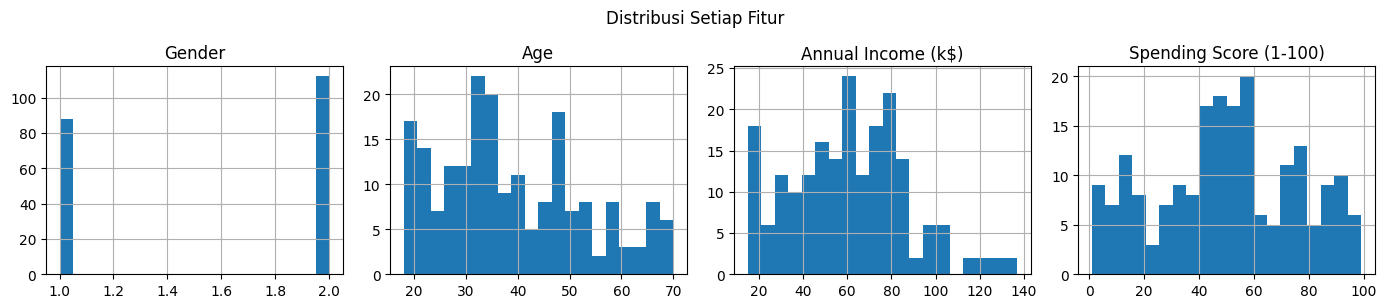

In [130]:
import matplotlib.pyplot as plt

# Histogram tiap kolom
df.hist(bins=20, figsize=(14, 10), layout=(4, 4))
plt.tight_layout()
plt.suptitle("Distribusi Setiap Fitur", y=1.02)
plt.show()


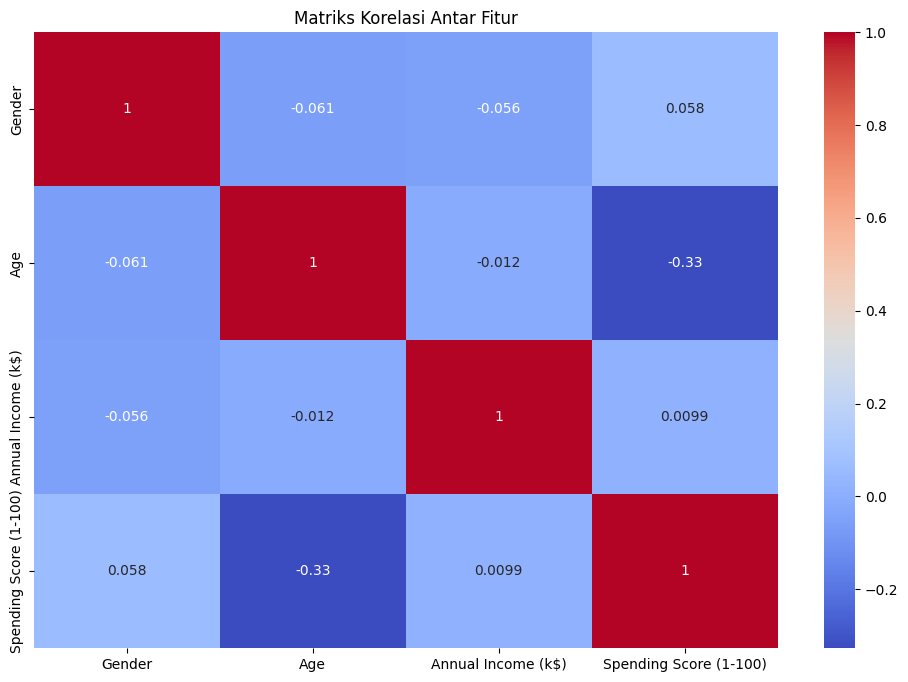

In [131]:
import seaborn as sns

# Heatmap korelasi antar fitur
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriks Korelasi Antar Fitur")
plt.show()


In [132]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


scaler = StandardScaler()
standardized_data = scaler.fit_transform(df)  # df = dataset numerik
data = standardized_data.tolist()

In [133]:
import numpy as np
# Misal, buang outlier ekstrem (lebih dari 3 std)
z = np.abs(StandardScaler().fit_transform(df))
df_no_outlier = df[(z < 3).all(axis=1)]

# Standarisasi ulang
data = StandardScaler().fit_transform(df_no_outlier).tolist()

In [134]:
# Split 80% train dan 20% test
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)


### Pemodelan: bangunlah model menggunakan data hasil praproses 2.b, dan lakukan proses traininguntuk mendapatkan hasil terbaik. Jelaskan secara detail semua proses yang Anda lakukan dilengkapi dengan justifikasi dan analisis hasilnya.

In [135]:
def euclidean_distance(x, y):
    total = 0
    for i in range(len(x)):
        total += (x[i] - y[i]) ** 2
    return total ** 0.5

In [136]:
# ============================
# 6. K-Means Manual
# ============================

def kmeans_manual(data, k, max_iter=100):
    centroids = [data[i] for i in range(k)]
    for iteration in range(max_iter):
        clusters = [[] for _ in range(k)]
        for row in data:
            distances = [euclidean_distance(row, c) for c in centroids]
            cluster_idx = distances.index(min(distances))
            clusters[cluster_idx].append(row)

        new_centroids = []
        for cluster in clusters:
            if len(cluster) == 0:
                new_centroids.append([0]*len(data[0]))
            else:
                centroid = []
                for i in range(len(data[0])):
                    nilai_rata = sum([row[i] for row in cluster]) / len(cluster)
                    centroid.append(nilai_rata)
                new_centroids.append(centroid)

        if new_centroids == centroids:
            break
        centroids = new_centroids

    labels = []
    for row in data:
        distances = [euclidean_distance(row, c) for c in centroids]
        cluster_idx = distances.index(min(distances))
        labels.append(cluster_idx)

    return labels, centroids


In [137]:
# ============================
# 7. Silhouette Score Manual
# ============================

def silhouette_score_manual(data, labels):
    total_silhouette = 0
    for i in range(len(data)):
        same_cluster = []
        other_clusters = {}
        for j in range(len(data)):
            if i != j:
                if labels[i] == labels[j]:
                    same_cluster.append(euclidean_distance(data[i], data[j]))
                else:
                    if labels[j] not in other_clusters:
                        other_clusters[labels[j]] = []
                    other_clusters[labels[j]].append(euclidean_distance(data[i], data[j]))

        a = sum(same_cluster) / len(same_cluster) if same_cluster else 0
        b = min([sum(dists)/len(dists) for dists in other_clusters.values()]) if other_clusters else 0

        s = (b - a) / max(a, b) if max(a, b) != 0 else 0
        total_silhouette += s

    return total_silhouette / len(data)


In [138]:
# ============================
# 8. Jalankan Clustering dan Evaluasi
# ============================

k = 2  # Jumlah cluster, bisa coba 2, 4, dll

labels, centroids = kmeans_manual(data, k)
sil_score = silhouette_score_manual(data, labels)

print(f"Silhouette Score untuk k={k}:", round(sil_score, 4))


Silhouette Score untuk k=2: 0.2518


In [139]:
for k in range(2, 6):
    labels, _ = kmeans_manual(data, k)
    score = silhouette_score_manual(data, labels)
    print(f"Silhouette Score untuk k={k}: {round(score, 4)}")


Silhouette Score untuk k=2: 0.2518
Silhouette Score untuk k=3: 0.2619
Silhouette Score untuk k=4: 0.3016
Silhouette Score untuk k=5: 0.2861


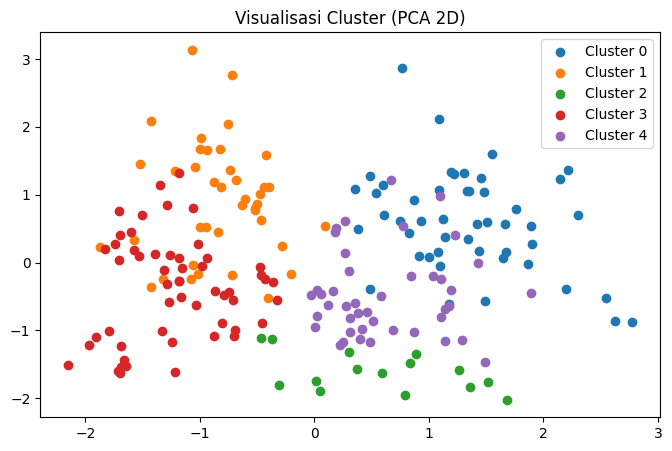

In [140]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduksi dimensi ke 2D
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

# Plot hasil cluster
plt.figure(figsize=(8,5))
for cluster in set(labels):
    plt.scatter(
        [data_2d[i][0] for i in range(len(data_2d)) if labels[i] == cluster],
        [data_2d[i][1] for i in range(len(data_2d)) if labels[i] == cluster],
        label=f"Cluster {cluster}"
    )

plt.title("Visualisasi Cluster (PCA 2D)")
plt.legend()
plt.show()
